[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/CodingPro777/AAI-530-GROUP-1/blob/main/final_project_code.ipynb
)


# USD AAI-530 Group 1 final project - Machine Learning with IoT(FitBit Fitness)

*Group 1 members: Ali Abdul-Hameed, Jack Kim, Jinyuan He*

The dataset is from Kaggle and originates from Fitbit wearable devices. The dataset contains Fitbit sensor data collected from April 12, 2016 to May 12, 2016.

Data download link: [download](https://www.kaggle.com/datasets/arashnic/fitbit)



In [1]:
# load packages
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

# 1. Data cleaning & EDA

## 1.1 Loading dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# upload dataset zip file to google drive if not exist
google_drive_path = '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1'

zip_file_path = google_drive_path + '/archive.zip'

if not os.path.isfile(zip_file_path):
  from google.colab import files
  uploaded = files.upload()
  !mv archive.zip '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1'


!unzip '/content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1/archive.zip'

Archive:  /content/drive/MyDrive/USD/2026 Spring/AAI-530-GROUP-1/archive.zip
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv  
  inflating: mturkfitbit_export_3.12.16-4.11.16/Fitabase

In [4]:
# combine two months dataset into one

raw_daily_activity_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')]
)

raw_weight_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')]
)

raw_hr_sec_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')]
)

raw_calories_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')]
)

raw_intensities_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv')]
)

raw_mets_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv')]
)

raw_sleep_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')]
)


raw_step_min_df = pd.concat(
    [pd.read_csv('/content/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv'),
    pd.read_csv('/content/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv')]
)

## 1.2 Dataset for calories prediction

In [5]:
# merge data files of intentity, METs and step
calories_df = raw_calories_min_df.merge(
    raw_intensities_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

calories_df = calories_df.merge(
    raw_mets_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

calories_df = calories_df.merge(
    raw_step_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

calories_df['ActivityMinute'] = pd.to_datetime(
    calories_df['ActivityMinute'],
    format='%m/%d/%Y %I:%M:%S %p'
)


In [6]:
calories_df.isna().sum()

,0
Id,0
ActivityMinute,0
Calories,0
Intensity,0
METs,0
Steps,0


In [7]:
# convert columns into numeric format
number_cols = [
    'Calories',
    'Intensity',
    'METs',
    'Steps'
]

calories_df[number_cols] = calories_df[number_cols].apply(pd.to_numeric)

In [8]:
pd.options.display.float_format = '{:.0f}'.format
calories_df.describe()

,Id,ActivityMinute,Calories,Intensity,METs,Steps
count,2917620,2917620,2917620,2917620,2917620,2917620
mean,4866573178,2016-04-10 19:20:27.486581760,2,0,14,5
min,1503960366,2016-03-12 00:00:00,0,0,0,0
25%,2320127002,2016-03-27 08:23:00,1,0,10,0
50%,4558609924,2016-04-12 01:12:00,1,0,10,0
75%,6962181067,2016-04-24 19:45:00,1,0,11,0
max,8877689391,2016-05-12 15:59:00,23,3,189,220
std,2433466479,NaN,1,1,12,18


### 1.2.1 Check minute-level time continuity in the dataset

In [9]:
# Sort by value
calories_df = calories_df.sort_values(['Id', 'ActivityMinute'], ascending=True)

# Remove duplicated data
calories_df = calories_df.drop_duplicates(subset=['Id', 'ActivityMinute'])

# Check minute-level time continuity in the dataset
calories_df.groupby('Id')['ActivityMinute'].diff().value_counts().head(30)

,count
ActivityMinute,
0 days 00:01:00,2760074
0 days 04:01:00,2
1 days 20:01:00,1
1 days 09:01:00,1
3 days 01:01:00,1
0 days 02:01:00,1
0 days 14:01:00,1
2 days 01:01:00,1
9 days 07:01:00,1


#### PS: The minute-level activity data is largely continuous, with over 99% of consecutive records occurring at 1-minute intervals. A small number of duplicate timestamps and occasional multi-hour gaps were observed, likely due to device synchronization or user inactivity.

In [10]:
# We mark time gaps in the data so that the records can be separated into sessions or removed when training time-series models.
calories_df['minute_gap'] = (
    calories_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
      .div(60)
)

calories_df['has_gap'] = (calories_df['minute_gap'] > 1).astype(int)

In [11]:
# Split into contiguous segments (per user)
calories_df['time_diff'] = (
    calories_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
)

EXPECTED_INTERVAL = 60   # second
THRESHOLD = 60 * 2  # 2 mins

calories_df['new_segment'] = (
    (calories_df['time_diff'] > THRESHOLD) |
    calories_df['time_diff'].isna()
)

calories_df['segment_id'] = (
    calories_df.groupby('Id')['new_segment']
      .cumsum()
)

calories_df['segment_uid'] = (
    calories_df['Id'].astype(str) + '_' +
    calories_df['segment_id'].astype(str)
)

# Filter long segments
segment_stats = (
    calories_df.groupby(['Id', 'segment_uid'])
      .agg(
          start_time=('ActivityMinute', 'min'),
          end_time=('ActivityMinute', 'max'),
          n_points=('ActivityMinute', 'count')
      )
      .reset_index()
)

segment_stats['duration_sec'] = (
    segment_stats['end_time'] - segment_stats['start_time']
).dt.total_seconds()

valid_segments = segment_stats[
    segment_stats['duration_sec'] >= THRESHOLD
]

calories_merged_df = calories_df.merge(
    valid_segments[['segment_uid']],
    on='segment_uid',
    how='inner'
)

### 1.2.2 EDA

### 1.2.2.1 Calories/Steps/Mets/Intensity Distribution

In [12]:
print(f"""
Number of users: {calories_merged_df['Id'].nunique()}
Number of segments: {calories_merged_df['segment_uid'].nunique()}
Number of points: {calories_merged_df['ActivityMinute'].count()}

Longest segment: {calories_merged_df['segment_uid'].value_counts().max() / 60} hours
Shortest segment: {calories_merged_df['segment_uid'].value_counts().min() / 60} hours
Average segment: {calories_merged_df['segment_uid'].value_counts().mean() / 60} hours
""")


Number of users: 35
Number of segments: 46
Number of points: 2760120

Longest segment: 1480.0 hours
Shortest segment: 12.0 hours
Average segment: 1000.0434782608696 hours



array([[<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'Steps'}>],
       [<Axes: title={'center': 'METs'}>,
        <Axes: title={'center': 'Intensity'}>]], dtype=object)

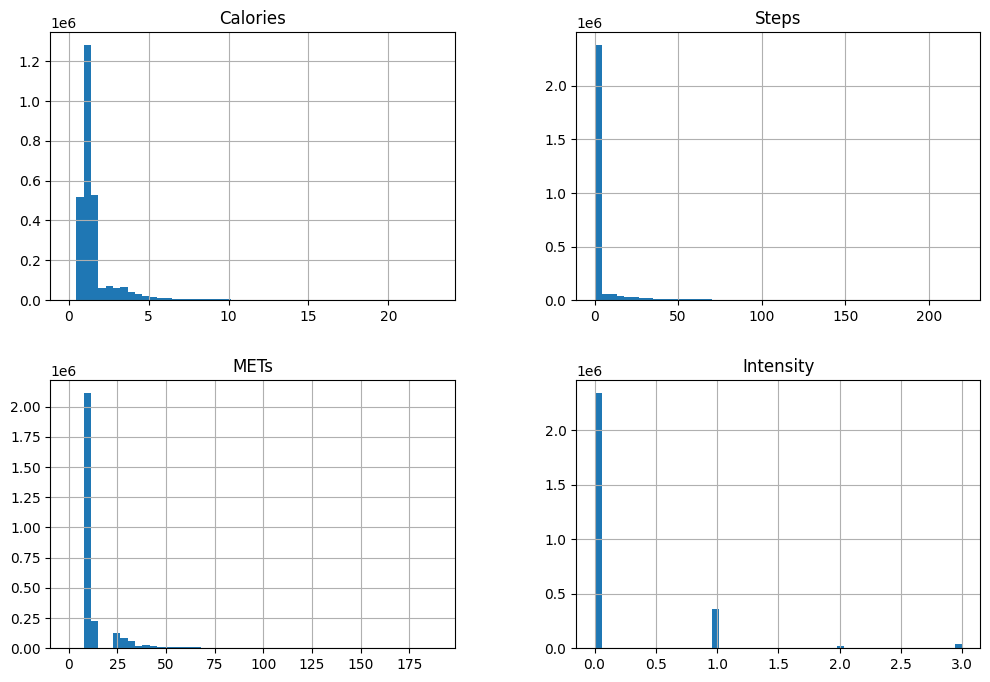

In [13]:
calories_merged_df[['Calories', 'Steps', 'METs', 'Intensity']].hist(bins=50, figsize=(12,8))

### 1.2.2.2 Calories Seasonality Analysis

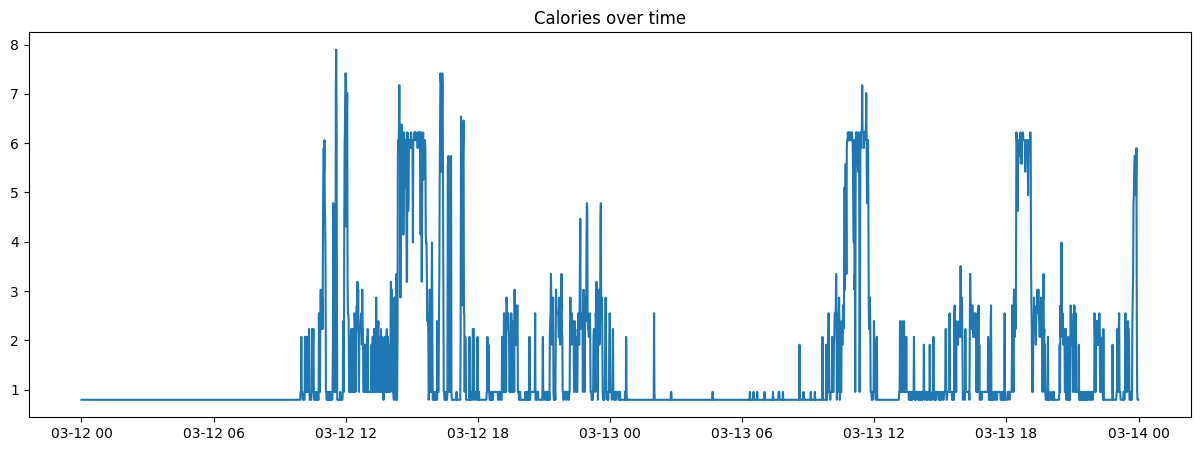

In [14]:
# Look for longest segment
segment_counts = calories_merged_df['segment_uid'].value_counts()
top_segment_uid = segment_counts.idxmax()
top_segment_len = segment_counts.max()

# plot one of user's calories expenditure graph
uid = calories_merged_df['Id'].iloc[0]
sample = (
    calories_merged_df[calories_merged_df['Id'] == uid]
        .head(2 * 24 * 60)
)
plt.figure(figsize=(15, 5))
plt.plot(sample['ActivityMinute'], sample['Calories'], label='Calories')
plt.title('Calories over time')
plt.show()

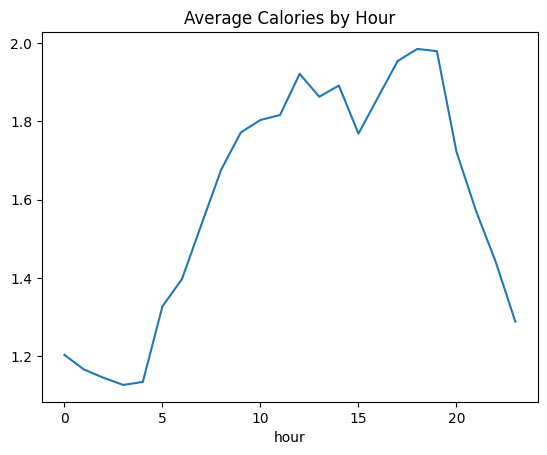

In [15]:
# plot the houlry average caloires expenditure of all users
calories_merged_df['hour'] = calories_merged_df['ActivityMinute'].dt.hour
calories_merged_df.groupby('hour')['Calories'].mean().plot(kind='line')
plt.title('Average Calories by Hour')
plt.show()

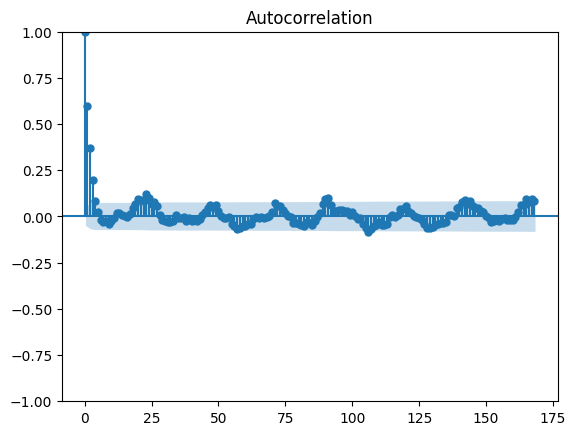

In [16]:
# Use ACF plot to examine temporal patterns in hourly calorie expenditure
calories_merged_df['hour'] = calories_merged_df['ActivityMinute'].dt.floor('h')
hourly_df = (
    calories_merged_df[calories_merged_df['segment_uid'] == top_segment_uid]
    .groupby('hour')
    .agg({
        'Calories': 'sum',
        'Steps': 'sum',
        'METs': 'mean',
        'Intensity': 'mean'
    })
    .reset_index()
)

hourly_df['hour_of_day'] = hourly_df['hour'].dt.hour
hourly_pattern = (
    hourly_df
    .groupby('hour_of_day')['Calories']
    .mean()
)

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(hourly_df['Calories'], lags=24*7)
plt.show()


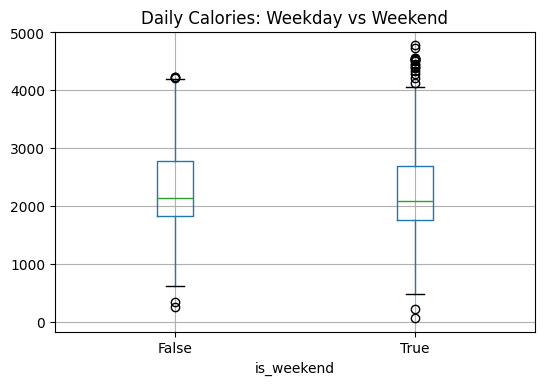

In [17]:
df = calories_merged_df.copy()

df["dayofweek"] = df["ActivityMinute"].dt.dayofweek
# Monday=0, Sunday=6
df["is_weekend"] = df["dayofweek"].isin([5, 6])

daily = (
    df.groupby(["Id", "is_weekend", df["ActivityMinute"].dt.date])["Calories"]
      .sum()
      .reset_index()
)

daily.boxplot(column="Calories", by="is_weekend", figsize=(6,4))
plt.title("Daily Calories: Weekday vs Weekend")
plt.suptitle("")
plt.show()

#### Interpretation

**1. Calories Distribution**
From the calories distribution, we observe that most calories burned per minute fall within the range of approximately 0 to 1.5, forming a right-skewed distribution. This indicates that while most minutes involve low energy expenditure, users occasionally reach much higher calorie burn levels, likely during periods of exercise. Similarly, Steps, METs, and Intensity exhibit comparable right-skewed patterns, reflecting sporadic bursts of higher activity.

**2. Hourly Activity Pattern**
The hourly average plot shows that calorie expenditure is lowest during nighttime hours and higher during daytime, corresponding to typical human activity and rest cycles. This pattern is consistent with expected daily routines and supports the validity of the data.

**3. Weekday vs. Weekend Comparison**
The boxplot comparison shows that daily calories burned on weekends are slightly higher than on weekdays. The medians and interquartile ranges are comparable for both groups, and no obvious abnormal patterns are observed, indicating a generally consistent distribution of calorie expenditure across weekdays and weekends.



### 1.2.3 Features Correlation

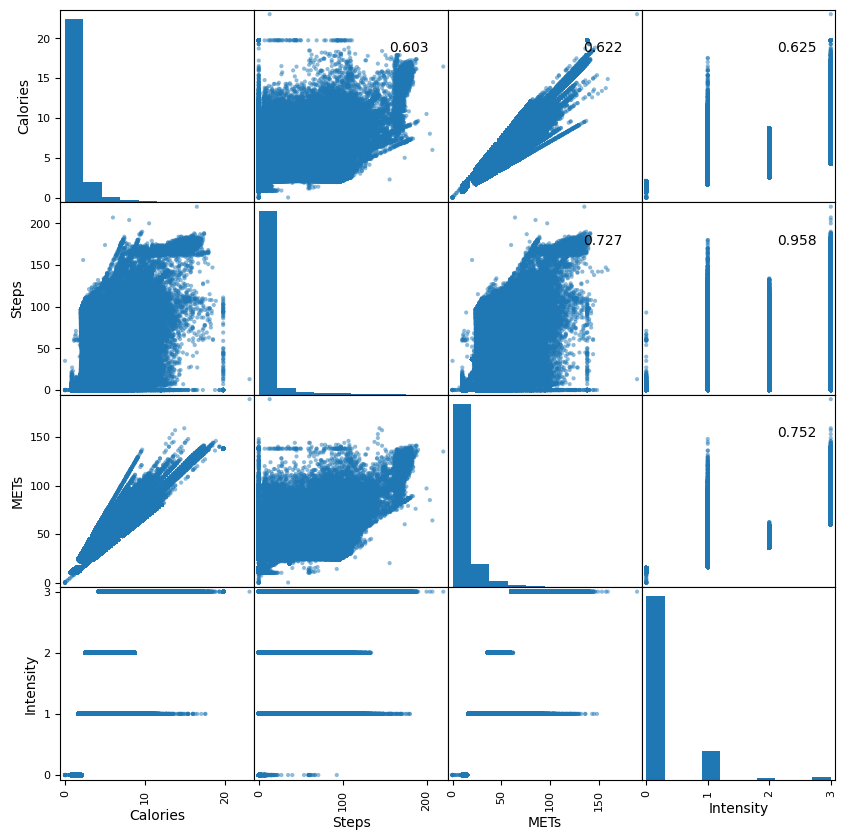

In [18]:
axes = pd.plotting.scatter_matrix(calories_merged_df[['Calories','Steps','METs','Intensity']], alpha=0.5,figsize= [10,10])
corr = calories_merged_df[['Calories','Steps','METs','Intensity']].corr(method = 'spearman').to_numpy()
#nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
  axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

## 1.3 Dataset for sleep status prediction



*   Merge sleep status with heart rate(min, max, avg)/Intensity/METs
*   Split into contiguous segments (per user)
*   Filter long segments




In [19]:
# ensure datetime
raw_hr_sec_df['Time'] = pd.to_datetime(raw_hr_sec_df['Time'])

# drill up to minute
raw_hr_sec_df['ActivityMinute'] = raw_hr_sec_df['Time'].dt.floor('min')

# aggregate
hr_min_df = (
    raw_hr_sec_df.groupby(['Id', 'ActivityMinute'])['Value']
      .agg(
          min_hr='min',
          max_hr='max',
          avg_hr='mean'
      )
      .reset_index()
)

In [20]:
# Merge sleep status with heart rate(min, max, avg)/Intensity/METs
raw_intensities_min_df['ActivityMinute'] = pd.to_datetime(
    raw_intensities_min_df['ActivityMinute'],
    format='%m/%d/%Y %I:%M:%S %p'
)

raw_mets_min_df['ActivityMinute'] = pd.to_datetime(
    raw_mets_min_df['ActivityMinute'],
    format='%m/%d/%Y %I:%M:%S %p'
)

raw_step_min_df['ActivityMinute'] = pd.to_datetime(
    raw_step_min_df['ActivityMinute'],
    format='%m/%d/%Y %I:%M:%S %p'
)

raw_sleep_min_df['date'] = pd.to_datetime(
    raw_sleep_min_df['date'],
    format='%m/%d/%Y %I:%M:%S %p'
)

sleep_status_df = hr_min_df.merge(
    raw_intensities_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_mets_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_step_min_df,
    on=['Id', 'ActivityMinute'],
    how='left'
)

sleep_status_df = sleep_status_df.merge(
    raw_sleep_min_df,
    left_on=['Id', 'ActivityMinute'],
    right_on=['Id', 'date'],
    how='left'
)

In [21]:
sleep_status_df.dropna(inplace=True)
sleep_status_df.drop(columns=['date', 'logId'], inplace=True)
sleep_status_df.isna().sum()

,0
Id,0
ActivityMinute,0
min_hr,0
max_hr,0
avg_hr,0
Intensity,0
METs,0
Steps,0
value,0


In [22]:
# Sort by value
sleep_status_df = sleep_status_df.sort_values(['Id', 'ActivityMinute'], ascending=True)

# Remove duplicated data
sleep_status_df = sleep_status_df.drop_duplicates(subset=['Id', 'ActivityMinute'])
sleep_status_df.dropna(subset=['value'], inplace=True)

# Check minute-level time continuity in the dataset
sleep_status_df.groupby('Id')['ActivityMinute'].diff().value_counts()

,count
ActivityMinute,
0 days 00:01:00,67769
0 days 00:02:00,26
0 days 00:03:00,19
0 days 00:05:00,12
0 days 00:04:00,10
...,...
0 days 17:25:00,1
0 days 16:41:00,1
0 days 17:16:00,1


In [23]:
sleep_status_df['time_diff'] = (
    sleep_status_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
)

In [24]:
# Split into contiguous segments (per user)
sleep_status_df['time_diff'] = (
    sleep_status_df.groupby('Id')['ActivityMinute']
      .diff()
      .dt.total_seconds()
)

EXPECTED_INTERVAL = 60   # second
THRESHOLD = 60 * 60 * 2  # 2 hours

sleep_status_df['new_segment'] = (
    (sleep_status_df['time_diff'] > THRESHOLD) |
    sleep_status_df['time_diff'].isna()
)

sleep_status_df['segment_id'] = (
    sleep_status_df.groupby('Id')['new_segment']
      .cumsum()
)

sleep_status_df['segment_uid'] = (
    sleep_status_df['Id'].astype(str) + '_' +
    sleep_status_df['segment_id'].astype(str)
)

# Filter long segments
segment_stats = (
    sleep_status_df.groupby(['Id', 'segment_uid'])
      .agg(
          start_time=('ActivityMinute', 'min'),
          end_time=('ActivityMinute', 'max'),
          n_points=('ActivityMinute', 'count')
      )
      .reset_index()
)

segment_stats['duration_sec'] = (
    segment_stats['end_time'] - segment_stats['start_time']
).dt.total_seconds()

valid_segments = segment_stats[
    segment_stats['duration_sec'] >= THRESHOLD
]

sleep_status_merge_df = sleep_status_df.merge(
    valid_segments[['segment_uid']],
    on='segment_uid',
    how='inner'
)

In [25]:
sleep_status_merge_df.groupby('segment_uid')['ActivityMinute'].diff().value_counts().head()

,count
ActivityMinute,
0 days 00:01:00,66654
0 days 00:02:00,23
0 days 00:03:00,18
0 days 00:05:00,10
0 days 00:04:00,10


### 1.3.1 EDA

In [26]:
print(f"""
Number of users: {sleep_status_merge_df['Id'].nunique()}
Number of segments: {sleep_status_merge_df['segment_uid'].nunique()}
Number of points: {sleep_status_merge_df['ActivityMinute'].count()}

Longest segment: {sleep_status_merge_df['segment_uid'].value_counts().max() / 60} hours
Shortest segment: {sleep_status_merge_df['segment_uid'].value_counts().min() / 60} hours
Average segment: {sleep_status_merge_df['segment_uid'].value_counts().mean() / 60} hours
""")


Number of users: 10
Number of segments: 153
Number of points: 66936

Longest segment: 12.066666666666666 hours
Shortest segment: 2.15 hours
Average segment: 7.291503267973856 hours



In [27]:
sleep_status_merge_df.describe()

,Id,ActivityMinute,min_hr,max_hr,avg_hr,Intensity,METs,Steps,value,time_diff,segment_id
count,66936,66936,66936,66936,66936,66936,66936,66936,66936,66927,66936
mean,5717265331,2016-04-20 02:27:36.124955392,61,64,62,0,10,0,1,375,11
min,2347167796,2016-03-29 00:00:00,37,41,39,0,10,0,1,60,1
25%,4388161847,2016-04-09 01:48:00,55,58,56,0,10,0,1,60,5
50%,5577150313,2016-04-20 01:13:00,60,63,62,0,10,0,1,60,11
75%,6962181067,2016-05-01 02:37:00,65,69,67,0,10,0,1,60,16
max,8792009665,2016-05-12 08:00:00,122,128,126,1,70,49,3,1455900,30
std,1801445211,NaN,9,10,9,0,2,1,0,10046,7


<Axes: xlabel='length', ylabel='Count'>

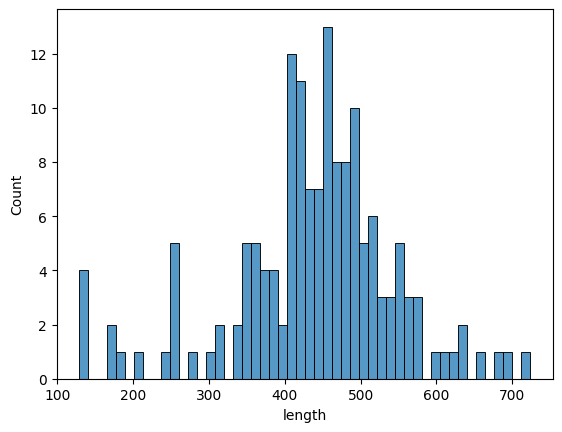

In [28]:
new_labels = ['Awake', 'Asleep', 'Restless']

segment_stats = (
    sleep_status_merge_df.groupby(['Id','segment_uid'])
      .size()
      .reset_index(name='length')
)

sns.histplot(segment_stats['length'], bins=50)

In [29]:
sleep_status_merge_df['value'].value_counts().sort_index()


,count
value,
1,62980
2,3321
3,635


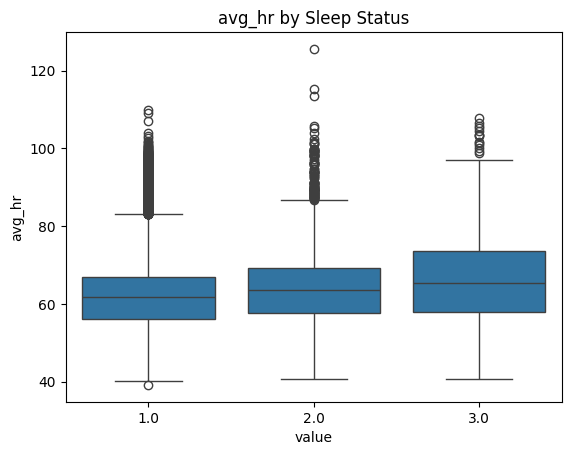

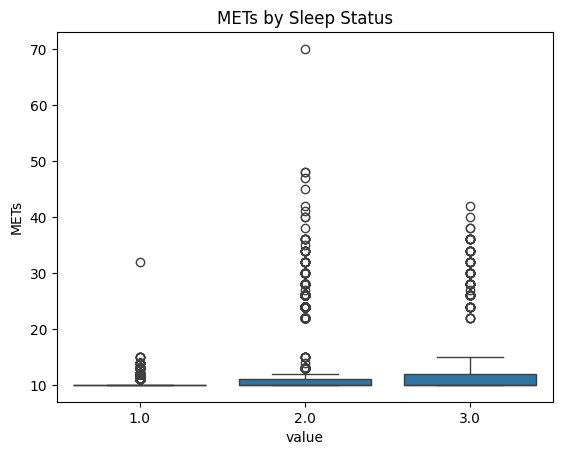

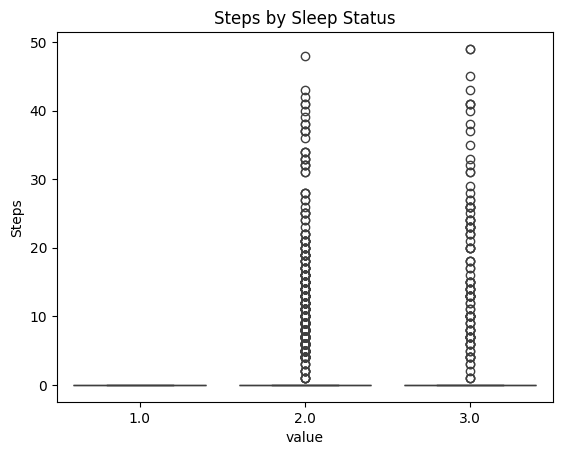

In [30]:
features = ['avg_hr', 'METs', 'Steps']

for f in features:
    sns.boxplot(
        x='value',
        y=f,
        data=sleep_status_merge_df,
    )
    plt.title(f'{f} by Sleep Status')
    plt.show()

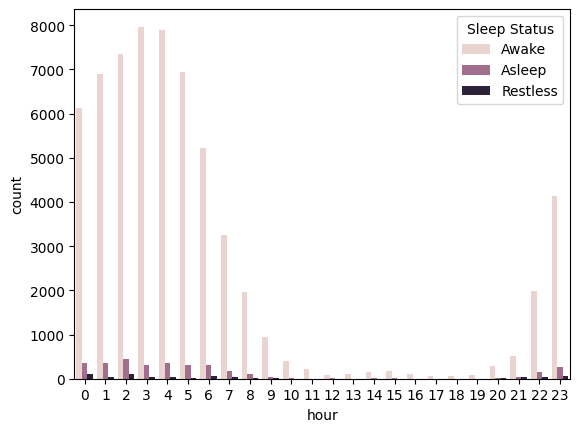

In [31]:
sleep_status_merge_df['hour'] = sleep_status_merge_df['ActivityMinute'].dt.hour

ax = sns.countplot(
    x='hour',
    hue='value',
    data=sleep_status_merge_df
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_labels, title='Sleep Status')
plt.show()

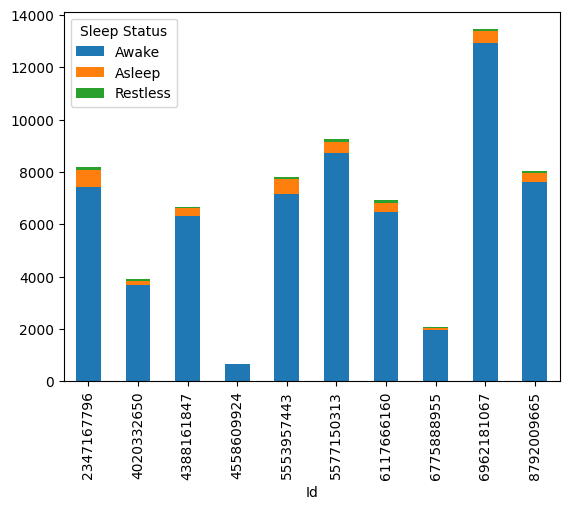

In [32]:
user_sleep_dist = (
    sleep_status_merge_df.groupby(['Id','value'])
           .size()
           .unstack(fill_value=0)
)
ax = user_sleep_dist.plot(kind='bar', stacked=True)
ax.legend(new_labels, title="Sleep Status")
plt.show()

#### Interpretation

In this dataset, sleep status is classified into three device-defined categories:
`1 = Asleep, 2 = Restless, and 3 = Awake`.

From the boxplots, the average heart rate during the `Asleep` state is consistently lower than in the other two states, which aligns with expected physiological patterns during sleep. In contrast, the `Awake` state exhibits significantly higher heart rates and greater variability, reflecting increased physical and mental activity. A similar trend is observed for METs, where activity intensity increases progressively from Asleep to `Awake`.

Notably, the `Restless` state shows a larger number of high-value outliers in both heart rate and `METs`. This suggests intermittent body movements, such as turning or repositioning during sleep, which are captured by wearable sensors as short bursts of activity. Correspondingly, step counts occasionally appear in both Restless and `Awake` states, likely caused by motion artifacts rather than sustained walking behavior.

Temporal distribution analysis indicates that most sleep records occur during nighttime hours, consistent with typical circadian sleep patterns. However, a non-negligible portion of sleep observations is also present during daytime, which may correspond to daytime naps or irregular sleep schedules.

Finally, user-level distributions reveal that most individuals exhibit a dominant `Asleep` state, with fewer observations in `Restless` and Awake states. This consistent pattern across users suggests stable sleep behavior and supports the generalizability of downstream sleep state modeling.





### 1.3.2 Features Correlation

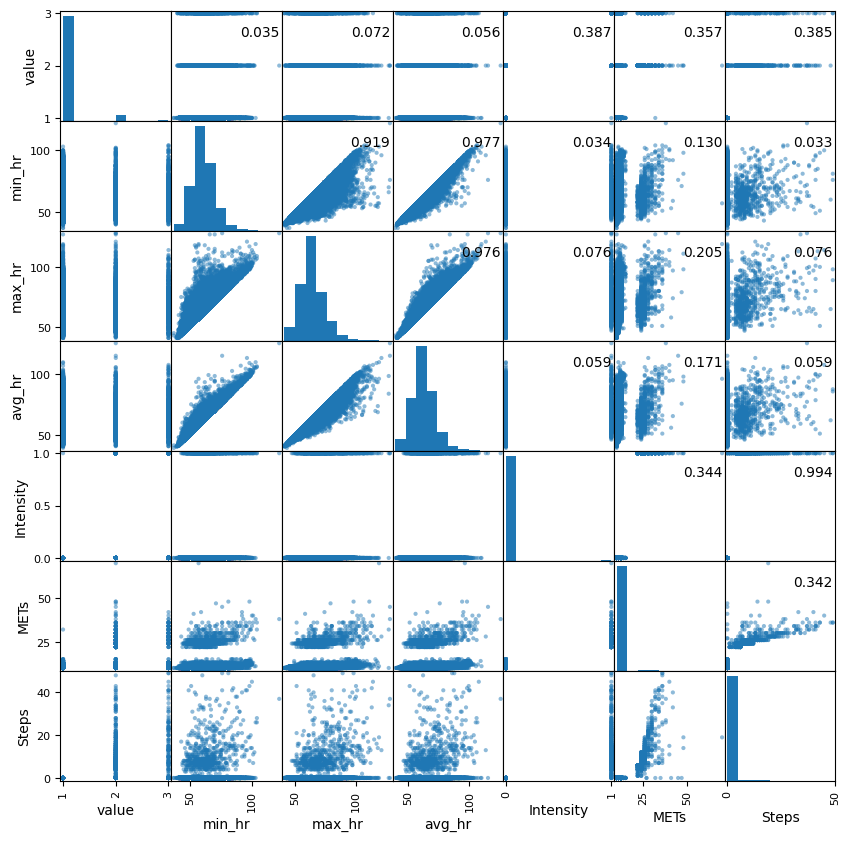

In [33]:
axes = pd.plotting.scatter_matrix(sleep_status_merge_df[['value','min_hr','max_hr','avg_hr','Intensity','METs','Steps']], alpha=0.5,figsize= [10,10])
corr = sleep_status_merge_df[['value','min_hr','max_hr','avg_hr','Intensity','METs','Steps']].corr(method = 'spearman').to_numpy()
#nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
  axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

## 1.4 Save cleaned datasets

In [34]:
# Save cleaned dataset
calories_merged_df[['Id', 'ActivityMinute', 'Calories', 'Intensity', 'METs', 'Steps']]. \
      to_csv(google_drive_path + '/calories_merged_df.csv')
sleep_status_merge_df[['Id', 'ActivityMinute', 'min_hr', 'max_hr', 'avg_hr', 'Intensity', 'METs', 'Steps', 'value', 'segment_uid']]. \
      to_csv(google_drive_path + '/sleep_status_merge_df.csv')

In [35]:
# load cleaned dataset

# calories_merged_df = pd.read_csv(google_drive_path + '/calories_merged_df.csv')
# sleep_status_merge_df = pd.read_csv(google_drive_path + '/sleep_status_merge_df.csv')
# sleep_status_merge_df

# 2 Model traning

## 2.1 Sleep Status Prediction with Convolutional Neural Network (CNN)

In [36]:
# prepare dataset
df = sleep_status_merge_df.copy()
df = df.sort_values(["segment_uid", "ActivityMinute"]).reset_index(drop=True)

df["y_binary"] = (df["value"] != 1).astype(int)

features = ["min_hr", "max_hr", "avg_hr", "Intensity", "METs", "Steps"]

X_raw = df[features].astype(float).values
y_raw = df["y_binary"].values

print("rows:", df.shape)
print("label counts:", np.bincount(y_raw))

rows: (66936, 15)
label counts: [62980  3956]


In [37]:
def make_windows(df_in, X, y, window=30, stride=5):
    """
    Create sliding windows of sequential data grouped by segment.

    Parameters:
    df_in : DataFrame containing a column 'segment_uid' to identify segments
    X     : Feature array (same order as df_in rows)
    y     : Label array (same order as df_in rows)
    window: Length of each time window
    stride: Step size for sliding window

    Returns:
    Xw : Windowed feature sequences (num_windows, window, num_features)
    yw : Label for each window (taken from the last timestep in the window)
    gw : Segment ID for each window
    """
    # lists to store windowed data
    Xw, yw, gw = [], [], []

    # Group indices by segment so windows do NOT cross segment boundaries
    for seg, idxs in df_in.groupby("segment_uid").indices.items():
        idxs = np.array(sorted(idxs))   # ensure indices are in time order

        xs = X[idxs]  # features for this segment
        ys = y[idxs]  # labels for this segment

        # Skip segments shorter than the window length
        if len(xs) < window:
            continue

        # Slide window across the segment using the given stride
        for i in range(0, len(xs) - window + 1, stride):
            Xw.append(xs[i:i+window])       # windowed feature sequence
            yw.append(ys[i+window-1])       # label = last timestep in window
            gw.append(seg)                  # track which segment this window came from

    # Convert lists to numpy arrays with appropriate data types
    return (
        np.array(Xw, dtype=np.float32),
        np.array(yw, dtype=np.int64),
        np.array(gw)
    )


WINDOW = 30   # length of each time sequence
STRIDE = 5    # step size when sliding the window


Xw, yw, gw = make_windows(df, X_raw, y_raw, window=WINDOW, stride=STRIDE)


print("windows:", Xw.shape)                 # shape of windowed feature data
print("window label counts:", np.bincount(yw))  # class distribution after windowing
print("num segments:", len(np.unique(gw)))  # number of unique segments used


windows: (12562, 30, 6)
window label counts: [11885   677]
num segments: 153


Note: After segmenting the data into 30 minute windows with a 5 minute stride, we obtained a total of 8837 windows across 103 unique sleep segments. Each window contains 6 physiological and activity features. Of these windows, 8,368 represent normal sleep and 469 represent disturbed sleep, showing that the dataset remains imbalanced after windowing.

In [38]:
# Split data using GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tr, te = next(gss.split(Xw, yw, groups=gw))

X_train, X_test = Xw[tr], Xw[te]
y_train, y_test = yw[tr], yw[te]

# Standardize features
scaler = StandardScaler()
X_train_2d = X_train.reshape(-1, X_train.shape[-1])
X_test_2d = X_test.reshape(-1, X_test.shape[-1])

# Fit scaler on both train and test datasets
X_train_2d = scaler.fit_transform(X_train_2d)
X_test_2d = scaler.transform(X_test_2d)

# Reshape back to original 3D format for sequence models
X_train = X_train_2d.reshape(X_train.shape)
X_test = X_test_2d.reshape(X_test.shape)

print("train:", X_train.shape, "test:", X_test.shape)
print("train counts:", np.bincount(y_train), "test counts:", np.bincount(y_test))

train: (10036, 30, 6) test: (2526, 30, 6)
train counts: [9484  552] test counts: [2401  125]


Note: To prevent data leakage the dataset was split by segment_uid using GroupShuffleSplit. This makes sure that windows from the same sleep segment do not appear in both the training and testing sets.

In [39]:
counts = np.bincount(y_train)
w0 = 1.0
w1 = float(counts[0] / counts[1]) if counts[1] > 0 else 1.0
class_weight = {0: w0, 1: w1}
class_weight

{0: 1.0, 1: 17.181159420289855}

In [40]:
def build_cnn(input_shape):
    """
    Build a 1D CNN model for time-series binary classification.

    input_shape = (timesteps, num_features)
    """
    x_in = layers.Input(shape=input_shape)

    # 1D convolution captures local temporal patterns
    x = layers.Conv1D(64, 5, padding="same")(x_in)
    x = layers.BatchNormalization()(x)  # stabilize training
    x = layers.ReLU()(x)                # non-linear activation
    x = layers.MaxPooling1D(2)(x)       # reduce sequence length

    x = layers.Conv1D(128, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(2)(x)

    x = layers.Conv1D(128, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # GlobalAveragePooling reduces each feature map to one value
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.3)(x)

    # Sigmoid for binary classification (outputs probability)
    y_out = layers.Dense(1, activation="sigmoid")(x)
    return models.Model(x_in, y_out)

model = build_cnn((WINDOW, len(features)))

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 6)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 30, 64)         │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 7, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,377 (302.25 KB)

 Trainable params: 76,737 (299.75 KB)

 Non-trainable params: 640 (2.50 KB)

In [41]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5)
]

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    class_weight=class_weight,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.7432 - auc: 0.7080 - loss: 1.2610 - val_accuracy: 0.9676 - val_auc: 0.7896 - val_loss: 0.4981 - learning_rate: 0.0010
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7812 - auc: 0.8032 - loss: 1.0740 - val_accuracy: 0.9487 - val_auc: 0.8147 - val_loss: 0.3847 - learning_rate: 0.0010
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8320 - auc: 0.8513 - loss: 0.9621 - val_accuracy: 0.9691 - val_auc: 0.8815 - val_loss: 0.2782 - learning_rate: 0.0010
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8489 - auc: 0.8859 - loss: 0.8506 - val_accuracy: 0.9666 - val_auc: 0.8868 - val_loss: 0.2518 - learning_rate: 0.0010
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8224 - auc: 0.8946 - loss: 0.8488 - val_accuracy: 0.9183 - val_auc: 0.9192 - val_loss: 0.2936 - learning_rate: 0.0010
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8271 - auc: 0.9171 - los

In [42]:
probs = model.predict(X_test).ravel()
pred = (probs >= 0.5).astype(int)

print("Macro F1:", round(f1_score(y_test, pred, average="macro"), 4))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=4))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Macro F1: 0.7536
[[2290  111]
 [  38   87]]
              precision    recall  f1-score   support

           0     0.9837    0.9538    0.9685      2401
           1     0.4394    0.6960    0.5387       125

    accuracy                         0.9410      2526
   macro avg     0.7115    0.8249    0.7536      2526
weighted avg     0.9567    0.9410    0.9472      2526



**Interpretation:**
The CNN model achieved a macro F1-score of 0.7536 on the test set. The confusion matrix and classification report show strong performance for detecting normal sleep, with a recall of 95.38% and an F1-score of 0.96. Performance for disturbed sleep was lower, with a recall of 69.6% and an F1-score of 0.53.

## 2.2 Activity Level prediction with Long Short-Term Memory (LSTM)

In [43]:
# Prepare data with segment awareness
df = calories_merged_df[calories_merged_df['segment_id'] > 1].copy()
df = df.sort_values(['segment_uid', 'ActivityMinute'])  # Ensure proper ordering

In [44]:
def create_sequences_by_segment(df, features, target, seq_length):
    """
    Create sequences that respect segment boundaries.
    Sequences will NOT cross segment boundaries.
    """
    X_sequences = []
    y_sequences = []
    segment_ids = []

    # Group by segment_uid to process each segment separately
    for segment_uid, group in df.groupby('segment_uid'):
        group = group.sort_values('ActivityMinute').reset_index(drop=True)

        # Only create sequences if segment is long enough
        if len(group) >= seq_length + 1:
            X_data = group[features].values
            y_data = group[target].values

            # Create sequences within this segment
            for i in range(len(group) - seq_length):
                X_sequences.append(X_data[i:(i + seq_length)])
                y_sequences.append(y_data[i + seq_length])
                segment_ids.append(segment_uid)

    return np.array(X_sequences), np.array(y_sequences), np.array(segment_ids)

In [45]:
# Create a categorical variable based on step counts
df['step_category'] = pd.cut(df['Steps'],
                              bins=[0, 10, 100, 1000],
                              labels=[0, 1, 2])

# Meaning of categories:
# 0 → very low activity (0–10 steps)
# 1 → low/moderate activity (11–100 steps)
# 2 → higher activity (101–1000 steps)

In [46]:
# Define features and target
target = 'step_category'
sequence_length = 10  # Use 10 minutes to predict the next minute
features = [
    'Intensity',
    'METs',
    'hour',  # Time of day matters for step patterns
    'steps_rolling_mean_5',
    'steps_rolling_std_5',
    'intensity_rolling_mean_3',
    'mets_rolling_mean_3'
]

# Create lag features within segments
def add_temporal_features(df):
    df = df.sort_values(['segment_uid', 'ActivityMinute']).copy()

    # Add hour from ActivityHour
    df['hour'] = pd.to_datetime(df['ActivityMinute']).dt.hour

    # Lag features (within segments only)
    for lag in [1, 2, 3]:
        df[f'steps_lag_{lag}'] = df.groupby('segment_uid')['Steps'].shift(lag)

    # Rolling features (within segments only)
    df['steps_rolling_mean_5'] = df.groupby('segment_uid')['Steps'].transform(
        lambda x: x.rolling(window=5, min_periods=1).mean()
    )
    df['steps_rolling_std_5'] = df.groupby('segment_uid')['Steps'].transform(
        lambda x: x.rolling(window=5, min_periods=1).std()
    )
    df['intensity_rolling_mean_3'] = df.groupby('segment_uid')['Intensity'].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean()
    )
    df['mets_rolling_mean_3'] = df.groupby('segment_uid')['METs'].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean()
    )

    df = df.fillna(0)

    return df

df = add_temporal_features(df)

In [47]:
# Create sequences respecting segment boundaries
X_seq, y_seq, seg_ids = create_sequences_by_segment(
    df, features, target, sequence_length
)

print(f"Created {len(X_seq)} sequences from {df['segment_uid'].nunique()} segments")
print(f"Sequence shape: {X_seq.shape}")  # (num_sequences, seq_length, num_features)

num_classes = 3
y_seq_categorical = keras.utils.to_categorical(y_seq, num_classes=num_classes)

Created 429670 sequences from 11 segments
Sequence shape: (429670, 10, 7)


In [48]:
# Split by segment to avoid data leakage
# Get unique segments
unique_segments = np.unique(seg_ids)
train_segments, test_segments = train_test_split(
    unique_segments, test_size=0.2, random_state=42
)

In [49]:
# Create train/test split based on segments
train_mask = np.isin(seg_ids, train_segments)
test_mask = np.isin(seg_ids, test_segments)

X_train = X_seq[train_mask]
y_train = y_seq_categorical[train_mask]
X_test = X_seq[test_mask]
y_test = y_seq_categorical[test_mask]
y_test_labels = y_seq[test_mask]  # Keep original labels for evaluation

print(f"\nTrain sequences: {len(X_train)}")
print(f"Test sequences: {len(X_test)}")
print(f"Train segments: {len(train_segments)}")
print(f"Test segments: {len(test_segments)}")


Train sequences: 318880
Test sequences: 110790
Train segments: 8
Test segments: 3


In [50]:
# Scale features
# Reshape for scaling: (samples * timesteps, features)
n_samples, n_timesteps, n_features = X_train.shape
X_train_reshaped = X_train.reshape(-1, n_features)
X_test_reshaped = X_test.reshape(-1, n_features)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

X_train_scaled = X_train_scaled.reshape(n_samples, n_timesteps, n_features)
X_test_scaled = X_test_scaled.reshape(-1, n_timesteps, n_features)

print(f"\nTrain shape: {X_train_scaled.shape}")
print(f"Test shape: {X_test_scaled.shape}")
print(f"Number of classes: {num_classes}")


Train shape: (318880, 10, 7)
Test shape: (110790, 10, 7)
Number of classes: 3


In [51]:
# Build LSTM model with segment awareness
model = keras.Sequential([
    # First LSTM layer
    layers.LSTM(256, activation='tanh', return_sequences=True,
                input_shape=(sequence_length, len(features))),
    layers.Dropout(0.2),  # Reduced dropout

    # Second LSTM layer
    layers.LSTM(128, activation='tanh', return_sequences=True),
    layers.Dropout(0.2),

    # Second LSTM layer
    layers.LSTM(64, activation='tanh', return_sequences=False),
    layers.Dropout(0.2),

    # Dense layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),

    # Output layer
    layers.Dense(num_classes, activation='softmax')  # softmax for multi-class
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # categorical cross-entropy loss
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

model.summary()

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',  # Monitor accuracy instead of loss
            patience=10,
            restore_best_weights=True,
            mode='max'
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6
        )
    ],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 256)        │       270,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 519,043 (1.98 MB)

 Trainable params: 519,043 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3986/3986 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8898 - loss: 0.2651 - precision: 0.8965 - recall: 0.8765 - val_accuracy: 0.9523 - val_loss: 0.1186 - val_precision: 0.9526 - val_recall: 0.9517 - learning_rate: 0.0010
Epoch 2/100
3986/3986 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.9023 - loss: 0.2264 - precision: 0.9036 - recall: 0.9003 - val_accuracy: 0.9520 - val_loss: 0.1166 - val_precision: 0.9523 - val_recall: 0.9515 - learning_rate: 0.0010
Epoch 3/100
3986/3986 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.9032 - loss: 0.2242 - precision: 0.9045 - recall: 0.9013 - val_accuracy: 0.9519 - val_loss: 0.1182 - val_precision: 0.9525 - val_recall: 0.9511 - learning_rate: 0.0010
Epoch 4/100
3986/3986 ━━━━━━━━━━━━━━━━━━━━ 36s 9ms/step - accuracy: 0.9037 - loss: 0.2231 - precision: 0.9051 - recall: 0.9021 - val_accuracy: 0.9545 - val_loss: 0.1153 - val_precision: 0.9555 - val_recall: 0.9524 - learning_rate: 0.0010
Epoch 5/100
3986/3986 ━━━━━━━━━━━━━━━━━━━━ 36s 9

In [53]:
# Evaluate
y_pred_proba = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

print("\n=== Model Performance ===")
print(f"Test Accuracy: {accuracy_score(y_test_labels, y_pred_classes):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_classes,
                          target_names=['Stationary', 'Light', 'Active']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_classes))

3463/3463 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step

=== Model Performance ===
Test Accuracy: 0.9323

Classification Report:
              precision    recall  f1-score   support

  Stationary       0.96      0.97      0.97     98870
       Light       0.67      0.62      0.64     10901
      Active       0.68      0.42      0.52      1019

    accuracy                           0.93    110790
   macro avg       0.77      0.67      0.71    110790
weighted avg       0.93      0.93      0.93    110790


Confusion Matrix:
[[96137  2713    20]
 [ 3996  6721   184]
 [   43   545   431]]


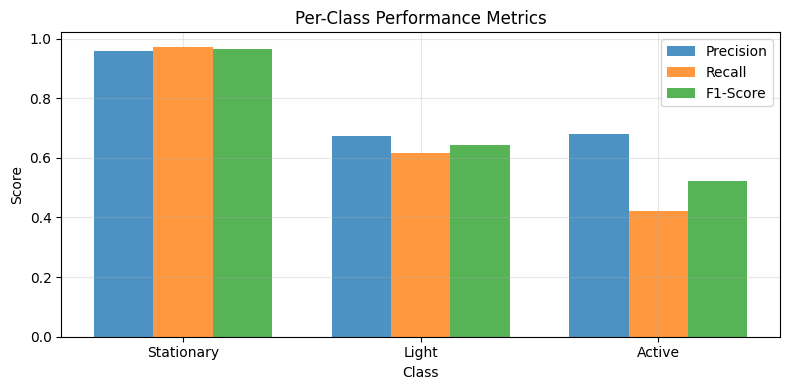

In [97]:
# Plot training history
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(
    y_test_labels, y_pred_classes
)

fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(num_classes)
width = 0.25

ax.bar(x - width, precision, width, label='Precision', alpha=0.8)
ax.bar(x, recall, width, label='Recall', alpha=0.8)
ax.bar(x + width, f1, width, label='F1-Score', alpha=0.8)

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Per-Class Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(['Stationary', 'Light', 'Active'])
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation:**
The classification report shows that the model achieves high overall accuracy (93%), mainly because it performs extremely well on the dominant Stationary class, which makes up the vast majority of the data. It has very high precision and recall for this class, meaning it can correctly identify stationary states most of the time. However, performance drops noticeably for the minority classes: Light activity is detected with moderate accuracy, while Active activity has relatively low recall, indicating the model misses more than half of true active cases. This pattern suggests a strong class imbalance problem, where the model is biased toward predicting the majority class and struggles to distinguish less frequent, but more important, activity levels.

## 2.3 ARIMA/SARIMA Time-Forcasting Model

In [70]:
# Make sure ActivityMinute is datetime
calories_merged_df['ActivityMinute'] = pd.to_datetime(calories_merged_df['ActivityMinute'])

# Create an hourly timestamp (floor to hour)
calories_merged_df['hour'] = calories_merged_df['ActivityMinute'].dt.floor('H')

# Aggregate to hourly metrics per user
hourly_ts = (
    calories_merged_df
    .groupby(['segment_uid', 'hour'])
    .agg(
        hourly_calories=('Calories', 'sum'),
        hourly_steps=('Steps', 'sum'),
        avg_intensity=('Intensity', 'mean'),
        avg_mets=('METs', 'mean')
    )
    .reset_index()
)

hourly_ts.head()

/tmp/ipython-input-2572130717.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  calories_merged_df['hour'] = calories_merged_df['ActivityMinute'].dt.floor('H')


,segment_uid,hour,hourly_calories,hourly_steps,avg_intensity,avg_mets
0,1503960366_1,2016-03-12 00:00:00,48,0,0,10
1,1503960366_1,2016-03-12 01:00:00,48,0,0,10
2,1503960366_1,2016-03-12 02:00:00,48,0,0,10
3,1503960366_1,2016-03-12 03:00:00,48,0,0,10
4,1503960366_1,2016-03-12 04:00:00,48,0,0,10


/tmp/ipython-input-3888127920.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  user_hourly = user_hourly.asfreq('H')


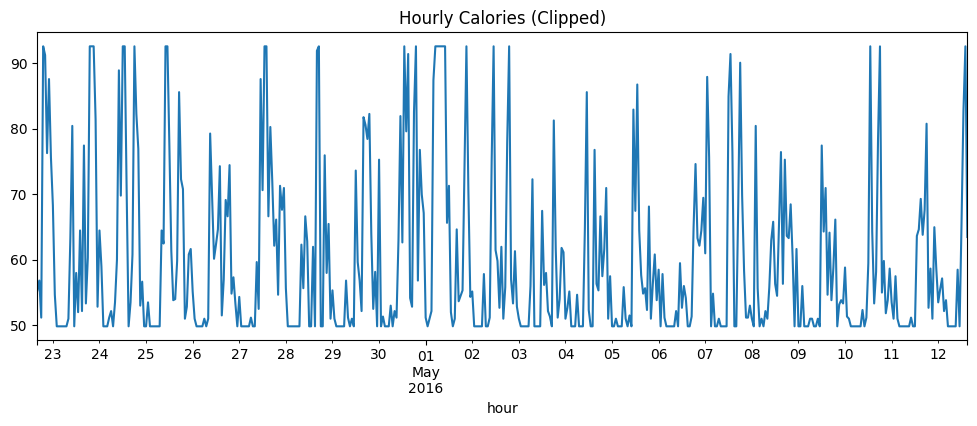

In [76]:
# Pick a segment with the most hours of data
segment_id = (
    hourly_ts.groupby('segment_uid')
    .size()
    .sort_values(ascending=False)
    .index[0]
)

user_hourly = (
    hourly_ts[hourly_ts['segment_uid'] == segment_id]
    .sort_values('hour')
    .set_index('hour')
)

# Ensure fixed hourly frequency
user_hourly = user_hourly.asfreq('H')

fill_cols = ['hourly_calories', 'hourly_steps', 'avg_intensity', 'avg_mets']
user_hourly[fill_cols] = user_hourly[fill_cols].fillna(0)

q_low = user_hourly['hourly_calories'].quantile(0.05)
q_high = user_hourly['hourly_calories'].quantile(0.95)

user_hourly['hourly_calories_clipped'] = user_hourly['hourly_calories'].clip(q_low, q_high)
user_hourly.iloc[1000:, user_hourly.columns.get_loc('hourly_calories_clipped')].plot(
    figsize=(12,4),
    title='Hourly Calories (Clipped)'
)
plt.show()

In [89]:
# Split training and testing dataset
TEST_HOURS = 24 * 3

train = user_hourly.iloc[:-TEST_HOURS]
test  = user_hourly.iloc[-TEST_HOURS:]

y_train = train['hourly_calories_clipped']
y_test  = test['hourly_calories_clipped']

In [92]:
from statsmodels.tsa.arima.model import ARIMA

# Simple ARIMA(p,d,q)
arima_model = ARIMA(y_train, order=(1,1,1))
arima_result = arima_model.fit()

print(arima_result.summary())

                                  SARIMAX Results                                  
Dep. Variable:     hourly_calories_clipped   No. Observations:                 1408
Model:                      ARIMA(1, 1, 1)   Log Likelihood               -5362.265
Date:                     Thu, 12 Feb 2026   AIC                          10730.529
Time:                             05:32:06   BIC                          10746.277
Sample:                         03-12-2016   HQIC                         10736.415
                              - 05-09-2016                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4474      0.021     21.655      0.000       0.407       0.488
ma.L1         -0.9960      0.003   -330.284      0.000      -1.002      -0.990
sigma2      

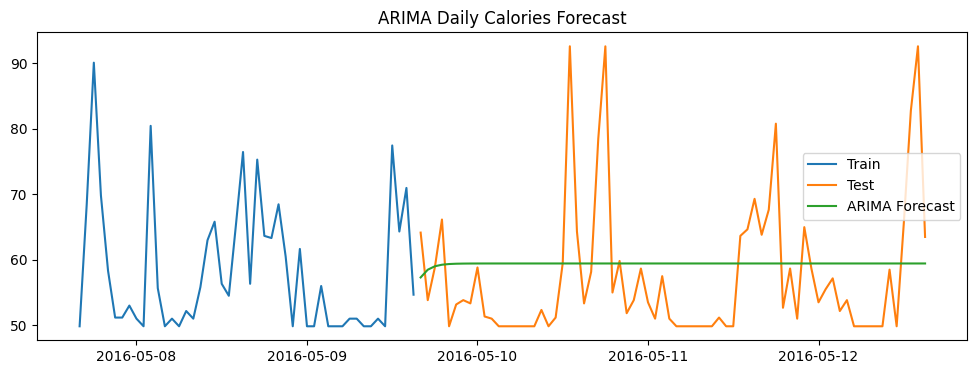

In [93]:
arima_forecast = arima_result.forecast(steps=len(test))

plt.figure(figsize=(12,4))
plt.plot(y_train[-48:].index, y_train[-48:], label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Daily Calories Forecast')
plt.show()

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, arima_forecast)
rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))

print(f"ARIMA MAE: {mae:.2f}")
print(f"ARIMA RMSE: {rmse:.2f}")

ARIMA MAE: 8.29
ARIMA RMSE: 10.63


In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(
    y_train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 24), # seasonal period, hourly daily cycle
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit()

print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:            hourly_calories_clipped   No. Observations:                 1408
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -5137.216
Date:                            Thu, 12 Feb 2026   AIC                          10284.432
Time:                                    05:29:40   BIC                          10310.497
Sample:                                03-12-2016   HQIC                         10294.191
                                     - 05-09-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3321      0.022     15.266      0.000       0.290       0.375
ma.L1         -0.9851      0.006   

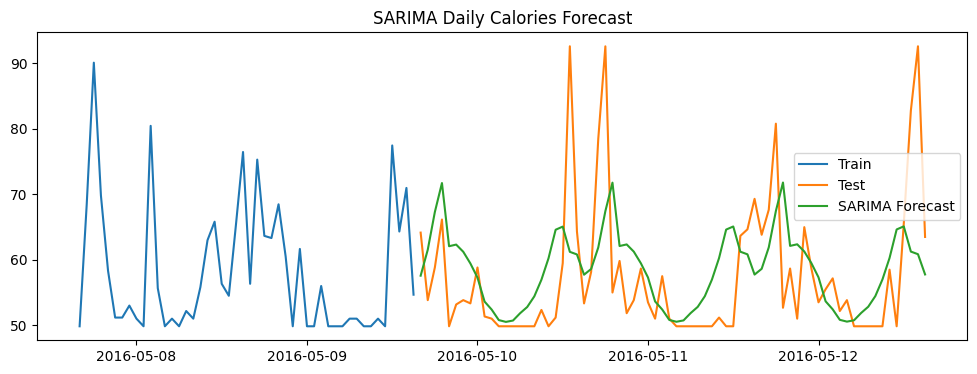

In [91]:
sarima_forecast = sarima_result.forecast(steps=len(test))

plt.figure(figsize=(12,4))
plt.plot(y_train[-48:].index, y_train[-48:], label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Daily Calories Forecast')
plt.show()

In [95]:
mae_s = mean_absolute_error(y_test, sarima_forecast)
rmse_s = np.sqrt(mean_squared_error(y_test, sarima_forecast))

print(f"SARIMA MAE: {mae_s:.2f}")
print(f"SARIMA RMSE: {rmse_s:.2f}")

SARIMA MAE: 6.83
SARIMA RMSE: 9.67


**Interpretation:** The results indicate that the SARIMA model performs better than the ARIMA model for forecasting daily calories. This is shown by both error metrics: SARIMA has a lower MAE (6.83 vs 8.29) and lower RMSE (9.67 vs 10.63), meaning its predictions are, on average, closer to the actual values and it handles larger errors more effectively. The improvement occurs because SARIMA accounts for seasonal patterns in the data, such as daily activity cycles, which are common in human behavior datasets like calorie expenditure. In contrast, the standard ARIMA model does not capture these seasonal fluctuations as well, leading to larger prediction errors.